In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import matplotlib.colors
import math

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim

In [28]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [30]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers= 4, random_state= 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


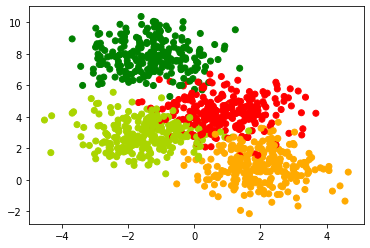

In [31]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap= my_cmap)
plt.show()

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(750, 2) (250, 2) (750,) (250,)


In [0]:
X_train, Y_train, X_test, Y_test = map(torch.tensor, (X_train, Y_train, X_test, Y_test))

In [0]:
device = torch.device("cuda")

X_train = X_train.float()
Y_train = Y_train.long()
X_train = X_train.to(device)
Y_train = Y_train.to(device)

In [0]:
class Network(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.classifier = nn.Sequential(
        nn.Linear(2,2*128),
        nn.Sigmoid(),
        nn.Linear(2*128, 4),
        nn.Softmax()
    )

  def forward(self, X):
     return self.classifier(X) 

In [0]:
def fit(x, y, model, opt, loss_fn, epochs = 1000):

  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item()  

In [37]:
fn = Network()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fn.to(device)
fit(X_train, Y_train, fn, opt, loss_fn)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.8227233290672302